# Deeplab

In [1]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from learn import *

In [11]:
sz = 256
num_slice = 25

num_gpus = 2
gpu_start = 8
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
torch.cuda.set_device(gpu_start)
bs = 10 * num_gpus

In [16]:
model_name = 'deeplab'

In [14]:
data = None
datapaths

['data/train/AOI_3_Paris_Train',
 'data/train/AOI_2_Vegas_Train',
 'data/train/AOI_4_Shanghai_Train',
 'data/train/AOI_5_Khartoum_Train']

In [15]:
learn, denorm, data = learner_on_dataset(datapaths[0], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True, data=data, num_slice=num_slice, sz=sz)
(trn_x,trn_y), (val_x,val_y) = data


Data finished loading: data/train/AOI_3_Paris_Train


In [17]:
learn.load('deeplab-paris')
learn.unfreeze()

    1      0.123757   0.086362   0.067723                      
 55%|█████▌    | 554/1004 [13:50<11:14,  1.50s/it, loss=0.126]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    4      0.121455   0.084645   0.067723                      
    5      0.123318   0.085855   0.067723                      
  7%|▋         | 70/1004 [01:47<23:52,  1.53s/it, loss=0.124] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    8      0.119867   0.087301   0.067723                      
    9      0.124303   0.085628   0.067723                      
 78%|███████▊  | 779/1004 [19:28<05:37,  1.50s/it, loss=0.124]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    12     0.124261   0.091716   0.067723                      
    13     0.126435   0.095357   0.067723                      
    14     0.126446   0.086101   0.067723                      
  7%|▋         | 71/1004 [01:43<22:39,  1.46s/it, loss=0.123] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    17     0.121677   0.086619   0.067723                      
    18     0.119711   0.08625    0.067723                      
 49%|████▉     | 492/1004 [12:11<12:41,  1.49s/it, loss=0.125]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    20     0.123378   0.084541   0.067723                      
    21     0.121797   0.087237   0.067723                      
    22     0.121613   0.088442   0.067723                      
    23     0.12444    0.085932   0.067723                      
    24     0.122528   0.086621   0.067723                      
    25     0.126497   0.08465    0.067723                      
 56%|█████▌    | 564/1004 [13:37<10:37,  1.45s/it, loss=0.124]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    26     0.121643   0.08816    0.067723                      
    27     0.119833   0.091279   0.067723                     
    28     0.124354   0.091231   0.067723                      
    29     0.121475   0.08779    0.067723                      

CPU times: user 2d 19h 38min 47s, sys: 2d 3h 36min 20s, total: 4d 23h 15min 7s
Wall time: 14h 19min 30s


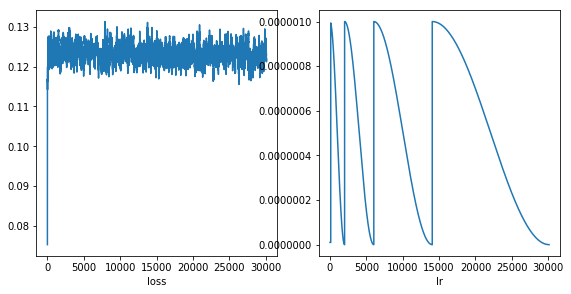

In [18]:
%%time
lr = 1e-5 / 10
lrs = np.array([lr/9, lr])
wd = 0.01
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-paris', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-paris')

  2%|▏         | 2/121 [00:06<06:06,  3.08s/it, loss=0.123]  


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   mask_acc                    
    0      0.259184   1.64266    0.802396  



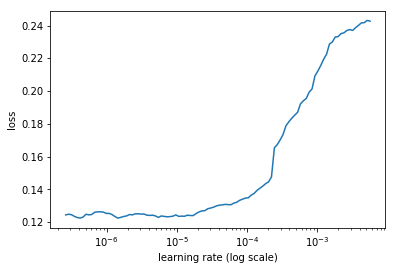

In [8]:
learn.lr_find(1e-7, 1e-2)
learn.sched.plot()